In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df=pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/telecom_churn.csv')

# Checking the data

In [4]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

# Split Dependent and Independent

In [6]:
X=df.drop(['churn'],axis=1)
Y=df[['churn']]

# Missing Value Check

In [23]:
X.isnull().mean()

state                     0.0
account length            0.0
area code                 0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
dtype: float64

# Splitting independent dataframe into Numerical and Categorical

In [24]:
char=X.select_dtypes(include='object')

In [34]:
# Adjusting the dataframe for area code since it is a categorical feature shown in numbers
area=X[['area code']]
char=pd.concat([char,area],axis=1,join="inner")

In [25]:
num=X.select_dtypes(include='number')

In [30]:
num=num.drop(['area code'],axis=1)

# Capping and Flooring of Outliers

In [37]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [38]:
num=num.apply(lambda x: outlier_capping(x))
num.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.983582,8.074707,179.792499,100.482748,30.565254,201.001962,100.129913,17.085401,200.789620,100.108227,9.035629,10.250945,4.467447,2.768269,1.557156
std,39.271198,13.622222,53.534032,19.628346,9.100745,49.816601,19.546408,4.234490,49.512031,19.218461,2.227999,2.699383,2.376841,0.728788,1.292043
min,12.537600,0.000000,51.853760,54.000000,8.815376,79.676320,53.000000,6.772256,79.515040,57.000000,3.580752,3.353760,1.000000,0.906128,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,195.000000,43.000000,305.146240,146.000000,51.874624,318.892480,147.000000,27.109248,317.208640,146.462400,14.273120,16.646240,13.000000,4.493872,6.000000


# Encode categorial features

In [44]:
X_char=pd.get_dummies(char,drop_first=True)

In [45]:
X_char.head()

,area code,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,408,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
X_char['area_code_408']=np.where(X_char['area code']==408,1,0)
X_char['area_code_510']=np.where(X_char['area code']==510,1,0)
X_char=X_char.drop(['area code'],axis=1)

# Create Master Dataset for Model Development

In [51]:
X_all=pd.concat([num,X_char],axis=1,join="inner")

In [73]:
# dropping Area code and reiterating the model to check for performance improvement
X_all=X_all.drop(['area_code_408','area_code_510'],axis=1)

In [74]:
X_all.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.983582,8.074707,179.792499,100.482748,30.565254,201.001962,100.129913,17.085401,200.789620,100.108227,...,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.096910,0.276628
std,39.271198,13.622222,53.534032,19.628346,9.100745,49.816601,19.546408,4.234490,49.512031,19.218461,...,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.447398
min,12.537600,0.000000,51.853760,54.000000,8.815376,79.676320,53.000000,6.772256,79.515040,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,195.000000,43.000000,305.146240,146.000000,51.874624,318.892480,147.000000,27.109248,317.208640,146.462400,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


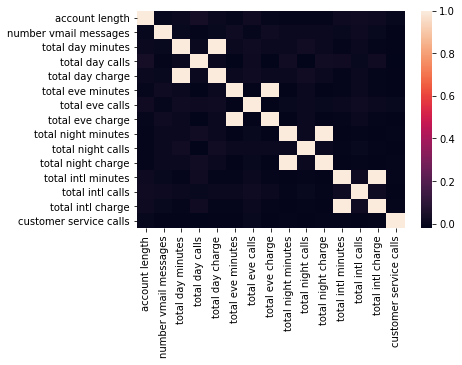

In [116]:
correlations=num.corr()
ax=sns.heatmap(correlations)

In [119]:
# Dropping additional variable based on correlation pattern among the features
X_all=X_all.drop(['total day charge','total eve charge','total night charge'],axis=1)

In [138]:
X_all=X_all.drop(['total intl charge'],axis=1)

# Standardizing the features in the numerical dataframe

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X_all),index=X_all.index, columns=X_all.columns).add_suffix('_std')


In [54]:
X_std.describe()

,account length_std,number vmail messages_std,total day minutes_std,total day calls_std,total day charge_std,total eve minutes_std,total eve calls_std,total eve charge_std,total night minutes_std,total night calls_std,...,state_VA_std,state_VT_std,state_WA_std,state_WI_std,state_WV_std,state_WY_std,international plan_yes_std,voice mail plan_yes_std,area_code_408_std,area_code_510_std
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,...,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,3.012891e-16,1.359049e-16,1.140535e-16,-1.580894e-16,-3.879285e-16,-1.904667e-16,-3.014557e-16,2.277739e-16,6.180675e-16,2.031911e-17,...,-1.461477e-16,1.234303e-16,-1.757936e-16,2.228274e-16,-9.702377e-16,-2.039906e-16,-1.021951e-16,6.921823e-17,-4.025183e-16,3.511209e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,...,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.252522e+00,-5.928489e-01,-2.390217e+00,-2.368499e+00,-2.390259e+00,-2.435811e+00,-2.411542e+00,-2.435876e+00,-2.449764e+00,-2.243400e+00,...,-1.537812e-01,-1.496417e-01,-1.421338e-01,-1.548003e-01,-1.812397e-01,-1.537812e-01,-3.275805e-01,-6.183963e-01,-5.795444e-01,-5.804683e-01
25%,-6.872118e-01,-5.928489e-01,-6.742984e-01,-6.870050e-01,-6.742496e-01,-6.906759e-01,-6.718310e-01,-6.909545e-01,-6.825551e-01,-6.821667e-01,...,-1.537812e-01,-1.496417e-01,-1.421338e-01,-1.548003e-01,-1.812397e-01,-1.537812e-01,-3.275805e-01,-6.183963e-01,-5.795444e-01,-5.804683e-01
50%,4.181330e-04,-5.928489e-01,-7.332871e-03,2.635624e-02,-7.171206e-03,7.991267e-03,-6.647384e-03,8.172013e-03,8.289724e-03,-5.632269e-03,...,-1.537812e-01,-1.496417e-01,-1.421338e-01,-1.548003e-01,-1.812397e-01,-1.537812e-01,-3.275805e-01,-6.183963e-01,-5.795444e-01,-5.804683e-01
75%,6.625803e-01,8.755606e-01,6.839200e-01,6.887631e-01,6.840847e-01,6.885894e-01,7.097042e-01,6.884032e-01,6.971146e-01,6.709022e-01,...,-1.537812e-01,-1.496417e-01,-1.421338e-01,-1.548003e-01,-1.812397e-01,-1.537812e-01,-3.275805e-01,1.617086e+00,1.725493e+00,1.722747e+00
max,2.394389e+00,2.564232e+00,2.341922e+00,2.319303e+00,2.341849e+00,2.366846e+00,2.398247e+00,2.367546e+00,2.351681e+00,2.412323e+00,...,6.502747e+00,6.682629e+00,7.035624e+00,6.459936e+00,5.517553e+00,6.502747e+00,3.052685e+00,1.617086e+00,1.725493e+00,1.722747e+00


# Train Test Split

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_std,Y, test_size=0.3,random_state=42)

# Check for randomness of train and test by testing the event rates across the two datasets

In [56]:
y_train.mean()

churn    0.145735
dtype: float64

In [57]:
y_test.mean()

churn    0.143
dtype: float64

In [126]:
X_train.shape

(2333, 64)

# Building the KNN Model

In [141]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors = 3, weights='distance',metric = 'minkowski', p = 2)
clf.fit(X_train,y_train)

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=3, weights='distance')

# Making Class Predictions

In [142]:
y_pred=clf.predict(X_test)

# Model Evaluation

In [61]:
from sklearn import metrics

In [143]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.85
Precision 0.3939393939393939
Recall 0.09090909090909091
f1_score 0.14772727272727273


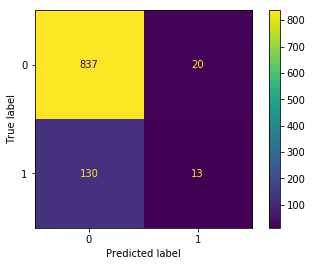

In [144]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

In [134]:
metrics.roc_auc_score(y_test,y_pred)

0.5425251527935309

In [135]:
pred_prob=clf.predict_proba(X_std)
pred_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.64394095, 0.35605905],
       [1.        , 0.        ]])

# Visualizing the Model Performance - Lorenz Curve

In [136]:
y_pred_prob = clf.predict_proba(X_std)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)
df['P_Rank_knn']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_knn')['churn'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_knn')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_knn',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_knn,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,334,0.991018,1.00000,331.0,331.0,0.685300,0.685300,3.0,3.0,0.001053,0.001053,0.6842,0.10021,0.10021,1
1,9,333,0.231231,0.30991,77.0,408.0,0.159420,0.844720,256.0,259.0,0.089825,0.090877,0.7538,0.09991,0.20012,2
2,8,333,0.045045,0.00000,15.0,423.0,0.031056,0.875776,318.0,577.0,0.111579,0.202456,0.6733,0.09991,0.30003,3
3,7,333,0.033033,0.00000,11.0,434.0,0.022774,0.898551,322.0,899.0,0.112982,0.315439,0.5831,0.09991,0.39994,4
4,6,333,0.024024,0.00000,8.0,442.0,0.016563,0.915114,325.0,1224.0,0.114035,0.429474,0.4856,0.09991,0.49985,5
5,5,334,0.020958,0.00000,7.0,449.0,0.014493,0.929607,327.0,1551.0,0.114737,0.544211,0.3854,0.10021,0.60006,6
6,4,333,0.033033,0.00000,11.0,460.0,0.022774,0.952381,322.0,1873.0,0.112982,0.657193,0.2952,0.09991,0.69997,7
7,3,333,0.027027,0.00000,9.0,469.0,0.018634,0.971014,324.0,2197.0,0.113684,0.770877,0.2001,0.09991,0.79988,8
8,2,333,0.021021,0.00000,7.0,476.0,0.014493,0.985507,326.0,2523.0,0.114386,0.885263,0.1002,0.09991,0.89979,9
9,1,334,0.020958,0.00000,7.0,483.0,0.014493,1.000000,327.0,2850.0,0.114737,1.000000,-0.0000,0.10021,1.00000,10


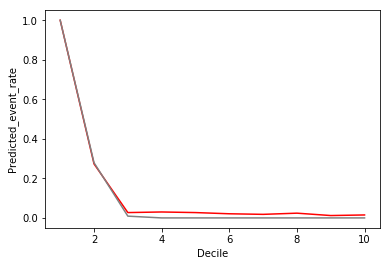

In [95]:
ax = sns.lineplot( x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

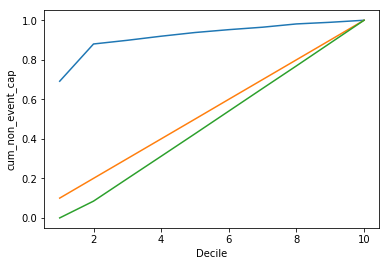

In [94]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed)
ax = sns.lineplot(x="Decile", y="cum_non_event_cap", data=sorted_reindexed)